In [239]:
#import modules
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [240]:
results = loadmat('yalefaces.mat')

In [241]:
X = results['X']

In [242]:
#a)
f10 = X[:, :640]
f10.shape

(1024, 640)

In [243]:
#b)
num_faces = 10
labels = np.zeros(X.shape[1])
for i in range(num_faces):
    labels[i * 64:(i + 1) * 64] = i

first_faces = X[:, :64 * num_faces]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = [], [], [], []

for i in range(num_faces):
    face_data = first_faces[:, i * 64:(i + 1) * 64]
    train_data, test_data = train_test_split(face_data.T, train_size=50, test_size=14, random_state=42)
    X_train.append(train_data)
    X_test.append(test_data)
    y_train += [i] * 50
    y_test += [i] * 14

X_train = np.array(X_train).reshape(-1, 1024).T
X_test = np.array(X_test).reshape(-1, 1024).T


In [244]:
print(X_train.shape, X_test.shape)

(1024, 500) (1024, 140)


[0, 0, 0, 0, 0, 0, 0, 0, 0]


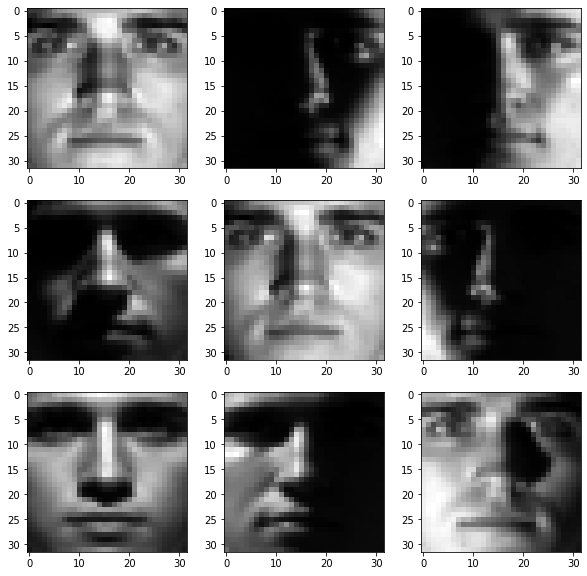

In [245]:
#verify split correct
print(y_train[:9])
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[:, 3*i+j].reshape(32, 32), cmap='gray')

In [246]:
#c)
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train.T)
X_test_pca = pca.transform(X_test.T)

In [247]:
lda = LDA()
lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

In [248]:
print(f"Classification accuracy with LDA: {accuracy_lda:.4f}")

Classification accuracy with LDA: 0.8357


In [249]:
#d)
svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [250]:
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [251]:
print(f"Classification accuracy with LDA: {accuracy_lda:.4f}")
print(f"Classification accuracy with SVM: {accuracy_svm:.4f}")
print(f"Classification accuracy with Decision Tree: {accuracy_dt:.4f}")

Classification accuracy with LDA: 0.8357
Classification accuracy with SVM: 0.6857
Classification accuracy with Decision Tree: 0.6786
